# Tesla and Exxon Mobile (Correlation and  Risk Analysis)

In [39]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [40]:
# Import for datareading:
import pandas_datareader as web
from pandas_datareader import data, wb
import datetime

## Setting the data 

In [44]:
# Define the list (Tesla and Exxon Mobil - petroleum company):
companies = ['TSLA','XOM']

In [42]:
# Set the date, from today to 1 year ago:
end = datetime.datetime.now()
start = datetime.datetime(end.year - 1,end.month,end.day)

In [45]:
for stock in companies:
    globals()[stock]= web.DataReader(stock,'yahoo', start, end)

## Data Analysis 

In [46]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,323.693626,310.552311,317.183466,317.309921,8.611507e+06,317.309921
std,29.053570,28.829212,28.755263,28.760221,4.931994e+06,28.760221
min,260.329987,244.589996,252.779999,250.559998,3.080700e+06,250.559998
25%,301.825012,289.139999,296.839996,295.020004,5.612250e+06,295.020004
50%,323.850006,311.709991,317.399994,318.869995,7.201400e+06,318.869995
75%,348.054993,334.740005,341.625000,341.994995,9.495350e+06,341.994995
max,387.459991,367.119995,375.000000,379.570007,3.364970e+07,379.570007


In [47]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004


In [48]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [50]:
XOM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,80.654582,79.287410,80.004104,79.955697,1.362876e+07,78.391905
std,4.154948,4.395066,4.228332,4.314426,5.204328e+06,4.127355
min,67.529999,64.650002,66.180000,65.510002,6.545200e+06,65.510002
25%,78.119999,76.335003,77.435001,77.050003,1.023095e+07,75.498394
50%,80.910004,79.709999,80.239998,80.290001,1.259570e+07,79.074524
75%,82.945000,81.660004,82.440002,82.294998,1.570185e+07,80.967625
max,89.300003,88.470001,88.639999,89.070000,4.728730e+07,85.730927


In [51]:
XOM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,85.199997,83.660004,83.820000,85.029999,11469300.0,81.646385
2018-01-03,86.970001,84.820000,85.160004,86.699997,13957700.0,83.249924
2018-01-04,87.220001,86.430000,86.790001,86.820000,10863000.0,83.365150
2018-01-05,86.879997,85.709999,86.750000,86.750000,11047600.0,83.297935
2018-01-08,87.150002,86.599998,86.699997,87.139999,10927100.0,83.672424


In [52]:
XOM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


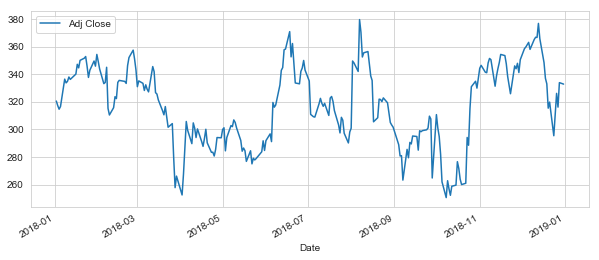

In [49]:
TSLA['Adj Close'].plot(legend = True, figsize = (10,4))

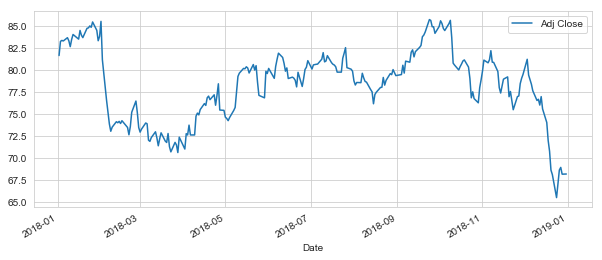

In [53]:
XOM['Adj Close'].plot(legend = True, figsize = (10,4))

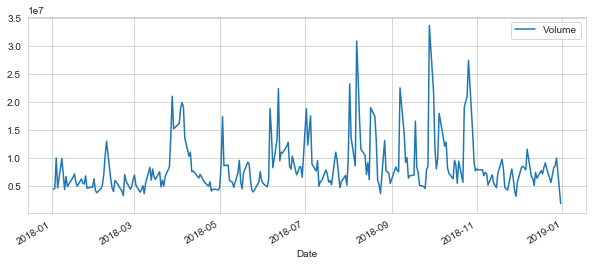

In [18]:
TSLA['Volume'].plot(legend = True, figsize = (10,4))

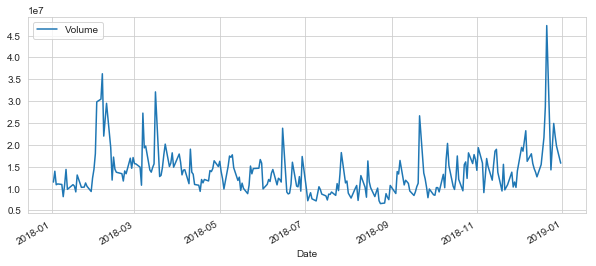

In [54]:
XOM['Volume'].plot(legend = True, figsize = (10,4))

In [55]:
# Moving average for 10, 20 and 50 days:
ma_day = [10,20,50]

In [56]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    TSLA[column_name]=TSLA['Adj Close'].rolling(window=ma).mean() 

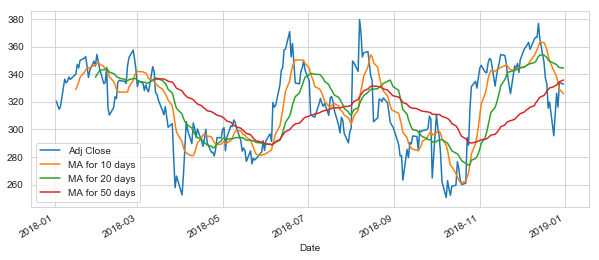

In [57]:
# Plots historical closing price, and moving averages of closing price for 10, 20, 50 days:
TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

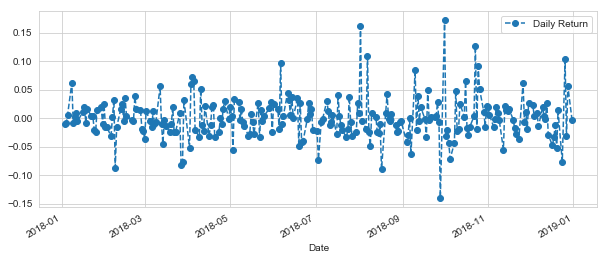

In [58]:
# Plots daily return for one year period: 
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

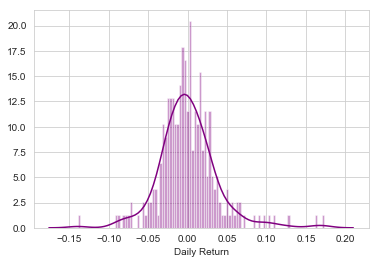

In [59]:
# Returns distribution of daily returns:
sns.distplot(TSLA['Daily Return'].dropna(), bins = 100, color = 'purple')

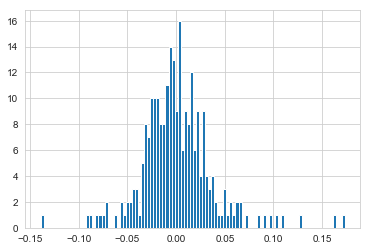

In [60]:
# Histogram with 100 bins for daily returns:
TSLA['Daily Return'].hist(bins = 100)

In [61]:
closing_df = web.DataReader(companies, 'yahoo', start, end)['Adj Close']

In [62]:
closing_df.head()

Symbols,TSLA,XOM
Date,,
2018-01-02,320.529999,81.646385
2018-01-03,317.250000,83.249924
2018-01-04,314.619995,83.365150
2018-01-05,316.579987,83.297935
2018-01-08,336.410004,83.672424


In [63]:
companies_rets = closing_df.pct_change()

In [64]:
companies_rets.head()

Symbols,TSLA,XOM
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010233,0.019640
2018-01-04,-0.008290,0.001384
2018-01-05,0.006230,-0.000806
2018-01-08,0.062638,0.004496


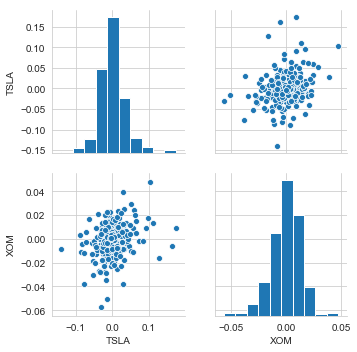

In [65]:
# We can call pairplot to get visual analysis for all companies in our DataFrame:
sns.pairplot(companies_rets.dropna())

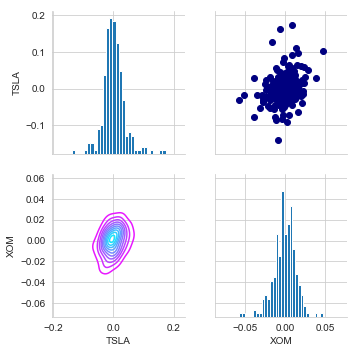

In [66]:
returns_fig = sns.PairGrid(companies_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'navy')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_r')

returns_fig.map_diag(plt.hist, bins = 30)

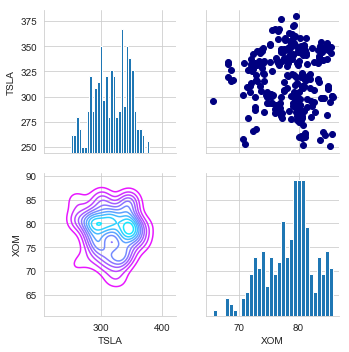

In [67]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color = 'navy')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_r')

returns_fig.map_diag(plt.hist, bins = 30)

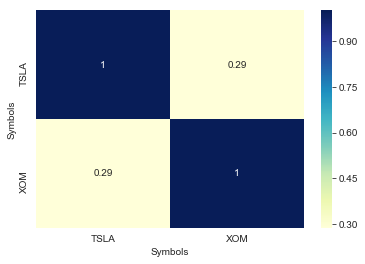

In [68]:
sns.heatmap(companies_rets.dropna().corr(), annot = True, cmap='YlGnBu')

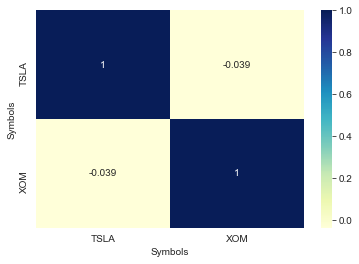

In [69]:
sns.heatmap(closing_df.dropna().corr(), annot = True, cmap='YlGnBu')

## Risk Analysis

##### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [70]:
# Define new dataframe rets, this is basically companies_rets without null values:
rets = companies_rets.dropna()

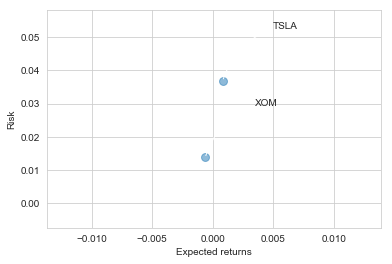

In [74]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, check the following line:
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = 0.3'))

### Value at risk using the "bootstrap" method¶

##### TESLA: 

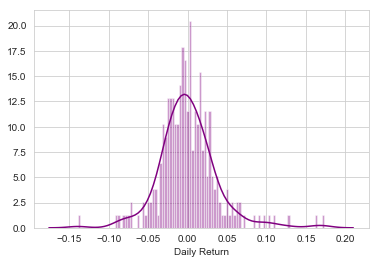

In [75]:
# Daily return histogram for TESLA stock: 
# using dropna() here, because NaN values can't be read by seaborn
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

In [76]:
# The 0.05 empirical quantile of daily returns
rets['TSLA'].quantile(0.05)

-0.050392586448631815

###### The 0.05 empirical quantile of daily returns is at -0.05039. That means that with 95% confidence, our worst daily loss will not exceed 5.04%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.05039... * 1,000,000 = 50,392 USD. 

##### EXXON MOBIL CORPORATION: 

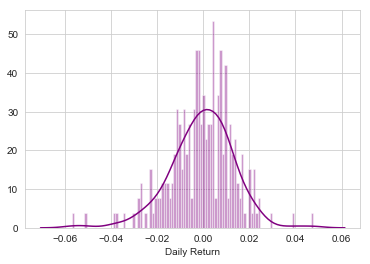

In [78]:
# Daily return histogram for Exxon Mobil Corporation stock: 

XOM['Daily Return'] = XOM['Adj Close'].pct_change()

sns.distplot(XOM['Daily Return'].dropna(),bins=100,color='purple')

In [79]:
# The 0.05 empirical quantile of daily returns
rets['XOM'].quantile(0.05)

-0.022967412526794753

###### The 0.05 empirical quantile of daily returns for XOM is at -0.02297. So with 95% confidence, our worst daily loss will not exceed 2.3%. If we have a 1 million dollar investment, our one-day 2.3% VaR is 0.022967... * 1,000,000 = 22,967 USD. 

### Value at Risk using the Monte Carlo method¶ 

##### TESLA:  

In [100]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for TESLA
mu = rets.mean()['TSLA']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['TSLA']

In [101]:
# Define the following fuction:

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [102]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999,NaN,NaN,NaN,NaN
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000,NaN,NaN,NaN,-0.010233
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995,NaN,NaN,NaN,-0.008290
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987,NaN,NaN,NaN,0.006230
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004,NaN,NaN,NaN,0.062638


Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

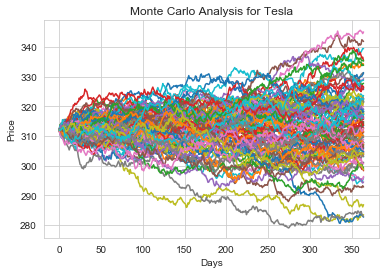

In [103]:
# Get start price from TSLA.head()
start_price = 312.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

###### Set the array for our simulation: 

In [104]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

###### Plot a histogram and use quartile to define the risk for this stock:

Text(0.5, 1.0, 'Final price distribution for Tesla Stock after 365 days')

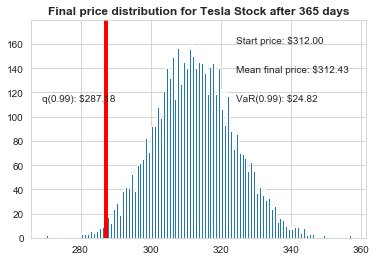

In [106]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Stock after %s days" % days, weight='bold')

##### Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Tesla stock, which looks to be 24.82 USD for every investment of 312.00 USD (the price of one inital google stock).

##### This basically means that for every initial stock you purchase your are putting about 24.82 USD at risk 99% of the time.

##### EXXON MOBIL 

In [112]:
# Now let's grab our mu (drift) from the expected return data we got for Exxon Mobile Corporation
mu = rets.mean()['XOM']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['XOM']

In [87]:
XOM.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2018-01-02,85.199997,83.660004,83.820000,85.029999,11469300.0,81.646385,NaN
2018-01-03,86.970001,84.820000,85.160004,86.699997,13957700.0,83.249924,0.019640
2018-01-04,87.220001,86.430000,86.790001,86.820000,10863000.0,83.365150,0.001384
2018-01-05,86.879997,85.709999,86.750000,86.750000,11047600.0,83.297935,-0.000806
2018-01-08,87.150002,86.599998,86.699997,87.139999,10927100.0,83.672424,0.004496


Text(0.5, 1.0, 'Monte Carlo Analysis for Exxon')

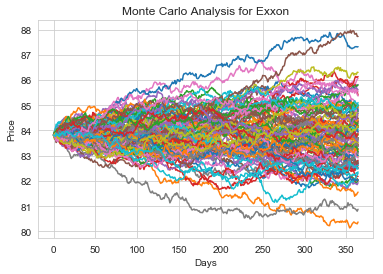

In [113]:
# Get start price from XOM.head()
start_price = 83.82

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Exxon')

Text(0.5, 1.0, 'Final price distribution for Exxon Stock after 365 days')

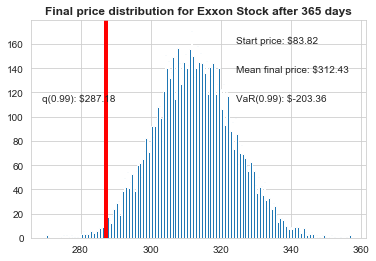

In [114]:
# Now we will define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Exxon Stock after %s days" % days, weight='bold')

##### Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Exxom stock, which looks to be 203.36 USD for every investment of 83.82 USD (the price of one inital google stock).

##### This basically means that for every initial stock you purchase your are putting about 203.36 USD at risk 99% of the time. By making an investment of 83 USD we are putting into the risk  203 USD - this is the reason why expected return for Exxon was negative -> loss.